In [33]:
!pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=10

In [4]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [5]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(dataset)

68

(32, 256, 256, 3)
[0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 2 0 1 0 1 1 0 1 0 0 0 2 0 0 1 0 0]
(32, 256, 256, 3)
[0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 2 0 1 0 1 1 0 1 0 0 0 2 0 0 1 0 0]
(32, 256, 256, 3)
[0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 2 0 1 0 1 1 0 1 0 0 0 2 0 0 1 0 0]
(32, 256, 256, 3)
[0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 2 0 1 0 1 1 0 1 0 0 0 2 0 0 1 0 0]
(32, 256, 256, 3)
[0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 2 0 1 0 1 1 0 1 0 0 0 2 0 0 1 0 0]
(32, 256, 256, 3)
[0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 2 0 1 0 1 1 0 1 0 0 0 2 0 0 1 0 0]
(32, 256, 256, 3)
[0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 2 0 1 0 1 1 0 1 0 0 0 2 0 0 1 0 0]
(32, 256, 256, 3)
[0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 2 0 1 0 1 1 0 1 0 0 0 2 0 0 1 0 0]
(32, 256, 256, 3)
[0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 2 0 1 0 1 1 0 1 0 0 0 2 0 0 1 0 0]
(32, 256, 256, 3)
[0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 2 0 1 0 1 1 0 1 0 0 0 2 0 0 1 0 0]
(32, 256, 256, 3)
[0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 2 0 1 0 1 1 0 1 0 0 0 2 0 0 1 0 0]
(32, 256, 256, 3)
[0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 2 0 1 0 1 1 0 1 0 0 0 2 0 0

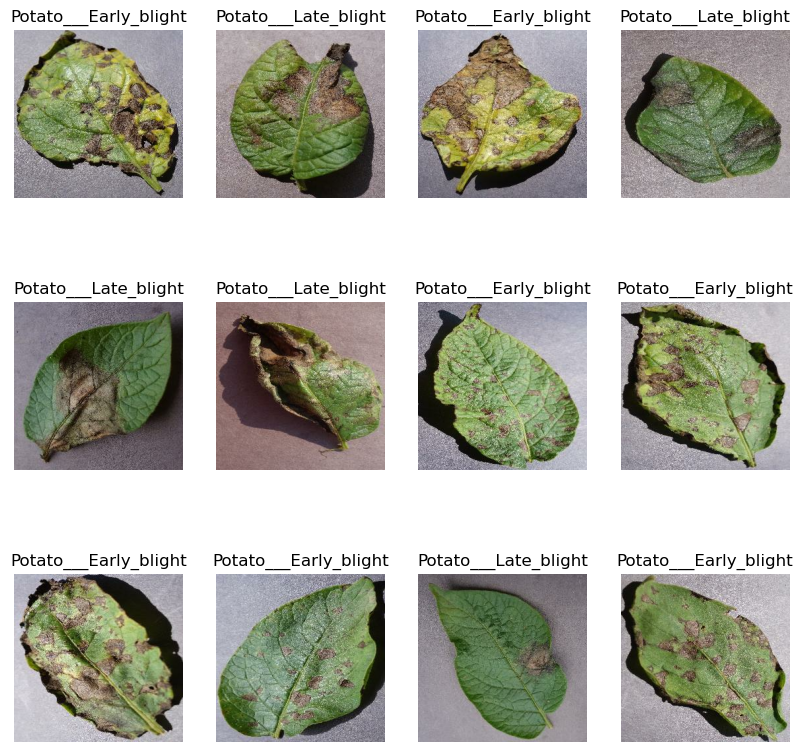

In [7]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
        print(image_batch.shape)
        print(label_batch.numpy())

In [8]:
len(dataset)

68

In [9]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [10]:
train_ds =dataset.take(54)
len(train_ds)

54

In [11]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [12]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [13]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [14]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [15]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size= int(train_split*ds_size)
    val_size= int(val_split*ds_size)

    train_ds=ds.take(train_size)

    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)

    return train_ds,val_ds,test_ds

In [16]:
train_ds,val_ds,test_ds= get_dataset_partitions_tf(dataset)

In [17]:
len(train_ds)

54

In [18]:
len(val_ds)

6

In [19]:
len(test_ds)

8

In [20]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [21]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),   
    layers.Rescaling(1.0 / 255)               
])

In [22]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [23]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

In [24]:
model = models.Sequential([
    layers.Input(shape=input_shape),
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [25]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [27]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - accuracy: 0.4256 - loss: 0.9961 - val_accuracy: 0.4844 - val_loss: 0.8447
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 55s 965ms/step - accuracy: 0.5294 - loss: 0.8673 - val_accuracy: 0.7396 - val_loss: 0.5745
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 49s 902ms/step - accuracy: 0.7488 - loss: 0.5843 - val_accuracy: 0.8646 - val_loss: 0.3875
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 48s 897ms/step - accuracy: 0.8411 - loss: 0.3967 - val_accuracy: 0.8438 - val_loss: 0.3313
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 49s 908ms/step - accuracy: 0.8594 - loss: 0.3680 - val_accuracy: 0.9062 - val_loss: 0.2460
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 49s 901ms/step - accuracy: 0.8795 - loss: 0.3226 - val_accuracy: 0.8906 - val_loss: 0.2769
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 48s 892ms/step - accuracy: 0.8949 - loss: 0.2657 - val_accuracy: 0.8438 - val_loss: 0.4302
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 49s 912ms/step - accuracy: 0.9164 - loss: 0.2373 - val_accura

In [28]:
scores=model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 26s 297ms/step - accuracy: 0.9216 - loss: 0.1927


In [29]:
scores

[0.22011268138885498, 0.921875]

In [30]:
history

In [31]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 54}

In [32]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [33]:
history.history['accuracy']

[0.4461805522441864,
 0.5729166865348816,
 0.7627314925193787,
 0.8287037014961243,
 0.8813657164573669,
 0.8877314925193787,
 0.9045138955116272,
 0.9091435074806213,
 0.9131944179534912,
 0.9259259104728699]

In [34]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

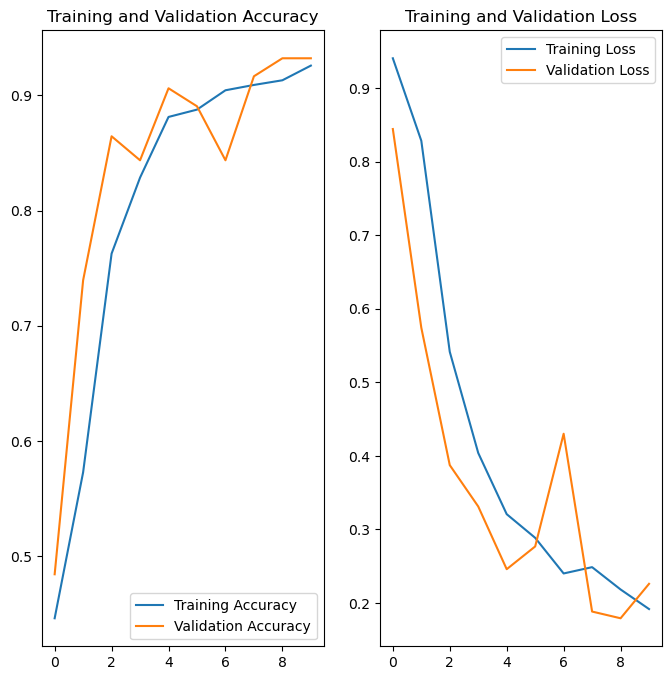

In [35]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [36]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
    
    first_image=images_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted_label:",class_names[np.argmax(batch_prediction[0])])

first image to predict
actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
predicted_label: Potato___Late_blight


In [37]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)

    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

In [38]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class,confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class},\n Confidence: {confidence}%")
        plt.axis("off")
        

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


In [48]:
import tensorflow as tf
model = tf.keras.models.load_model('../saved_models/1.keras')


In [60]:
model.export('C:/Users/shailaja/Music/Potato Disease Project/Potato-disease-detection-using-deep-learning/Potato Disease/saved_models/potatoes_model_tf')


INFO:tensorflow:Assets written to: C:/Users/shailaja/Music/Potato Disease Project/Potato-disease-detection-using-deep-learning/Potato Disease/saved_models/potatoes_model_tf\assets


INFO:tensorflow:Assets written to: C:/Users/shailaja/Music/Potato Disease Project/Potato-disease-detection-using-deep-learning/Potato Disease/saved_models/potatoes_model_tf\assets


Saved artifact at 'C:/Users/shailaja/Music/Potato Disease Project/Potato-disease-detection-using-deep-learning/Potato Disease/saved_models/potatoes_model_tf'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  1837579890000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1837579890960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1837579891152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1837579892304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1837579892496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1837579893072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1837579893264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1837579893840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1837579891728: TensorSpec(shape=(), dtype=tf.resou